In [ ]:
import time
T1 = time.process_time()

import pandas as pd

import numpy as np
my_seed = 2017
np.random.seed(my_seed)

import random 
random.seed(my_seed)

import tensorflow as tf
tf.random.set_seed(my_seed)

In [50]:
#导入数据测试
df2='45.xlsx'
data2=pd.read_excel(df2)
data2.head(10)

,timestamp,link_id,throughput,delay,jitter,loss,入端口,出端口,组合
0,00:56:56.600000,4-3-2-5,0,1.355648,1.355648,0.0,4,5,45
1,00:57:09.600000,4-3-2-5,3200,1.294017,0.061631,0.0,4,5,45
2,00:57:36.700000,4-3-2-5,0,1.390100,1.390100,0.0,4,5,45
3,00:57:49.700000,4-3-2-5,4930,1.552820,0.162721,0.0,4,5,45
4,00:58:02.700000,4-3-2-5,753,1.465440,0.087380,0.0,4,5,45
5,00:58:15.700000,4-3-2-5,705,1.517892,0.052452,0.0,4,5,45
6,00:58:28.700000,4-3-2-5,720,1.559973,0.042081,0.0,4,5,45
7,00:58:41.800000,4-3-2-5,772,3.505945,1.945972,0.0,4,5,45
8,00:58:54.800000,4-3-2-5,672,0.675440,2.830505,0.0,4,5,45
9,00:59:07.800000,4-3-2-5,1668,7.353544,6.678104,0.0,4,5,45


In [99]:
# 创建一个Series对象
s = data2["jitter"]
#s = data2["jitter"]
# 将Series转换为ndarray
arr = s.to_numpy()
# 输出数组
print(arr)

[ 1.35564804  0.0616312   1.39009952 ... 41.685462   41.73803329
  0.26869774]


In [100]:
type(arr)

numpy.ndarray

In [101]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'SimHei'

In [102]:
#all_data = np.fromfile("ec_data")
all_data=arr
type(all_data)

numpy.ndarray

In [103]:
from sklearn.preprocessing import MinMaxScaler
stand_scaler = MinMaxScaler()
all_data = stand_scaler.fit_transform(all_data.reshape(-1,1))

In [104]:
#sequence_len = 10 #原来的
sequence_len = 5 #最适合
X = []
Y = []
for i in range(len(all_data)-sequence_len):
    X.append(all_data[i:i+sequence_len])
    Y.append(all_data[i+sequence_len])
X = np.array(X)
Y = np.array(Y)
#这段代码的作用是将一个给定时间序列数据 `all_data` 按照指定的时间步长 `sequence_len` 进行滑窗切分，切分出一系列的样本数据，以便之后输入模型进行训练或预测。
#具体来说，假设原始的时间序列数据为 $[x_1, x_2, ..., x_n]$，那么代码首先定义了两个空列表 `X` 和 `Y`，然后在一个 for 循环中对原始数据进行了以下处理：
#1. 对于每个下标 `i`，从原始数据中切分出长度为 `sequence_len` 的子序列 `all_data[i:i+sequence_len]`，并将该子序列添加到 `X` 列表中；
#2. 将切分后的子序列的下一个元素 `all_data[i+sequence_len]` 添加到 `Y` 列表中。
#最终，`X` 和 `Y` 数组将分别包含所有通过滑窗切分得到的样本数据和对应的标签数据。其中，`X` 的形状为 `(n-sequence_len, sequence_len)`，
#表示共有 `n-sequence_len` 个样本，每个样本有 `sequence_len` 个特征值；而 `Y` 的形状为 `(n-sequence_len,)`，表示每个样本对应一个标签（即下一个时间步的特征值）。

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05)

In [106]:
import tensorflow as tf
from tensorflow import keras


In [107]:
from keras.models import Sequential
from keras.layers import Dense,LSTM


def build_model(activation_name,):
    model = Sequential()
    #model.add(LSTM(128, input_shape=(sequence_len,1),return_sequences=True))  #原来的
    #model.add(LSTM(128, input_shape=(sequence_len,1),return_sequences=True))
    #model.add(LSTM(64))
   # model.add(Dense(1,activation=activation_name))
    #optimizer =tf.optimizers.Adam(learning_rate=0.1) #原来的
    optimizer =tf.optimizers.Adam(learning_rate=0.05)
    #model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mape'])
    #model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mape'])
    
    model.add(keras.layers.LSTM(units=32, input_shape=(None, 1)))
    model.add(keras.layers.Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


#这些代码是用来构建一个神经网络模型，主要应用于时间序列数据的预测。具体作用如下：
#导入Keras库中的Sequential顺序模型和LSTM层
#定义了一个函数build_model，用于构建神经网络模型
#在模型中添加了两个LSTM层，分别为含有128个节点的输入层和含有64个节点的输出层
#向模型添加了一个具有1个节点的稠密层(Dense)，并指定激活函数为用户提供的activation_name参数（实现可配置）
#定义了优化器Adam，并设置学习率为0.1
#编译了模型，指定损失函数为均方差误差（mean_squared_error），优化器为Adam，并使用平均绝对百分比误差（mean absolute percentage error）进行模型评估
#返回构建好的模型

In [108]:
lstm = build_model("sigmoid")
step = 250

In [109]:
X_train.shape

(1167, 5, 1)

In [110]:
#history = lstm.fit(
#    X_train, Y_train, epochs=50, batch_size = 32,verbose=0,validation_data = (X_test, Y_test)
#    )
history = lstm.fit(
    X_train, Y_train, epochs=50, batch_size = 32,verbose=0,validation_data = (X_test, Y_test)
    )

#epochs (轮数): 整个训练集数据将被用来训练神经网络50次。
#batch_size (批处理大小)：每个训练批次包含的样本数量为32。
#verbose (冗长模式): 设置为0以关闭详细输出。
#validation_data (验证数据): 将测试集作为验证数据传入，以了解模型的表现情况。
#总体来说，lstm.fit()方法会根据提供的训练数据和超参数对模型进行训练，
#并且返回一个 history 对象，其中包含一些有关模型表现的统计信息（例如每轮结束后的训练和验证损失、准确度等）。

In [111]:
Y_predict = lstm.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [112]:
Y_predict_real = stand_scaler.inverse_transform(Y_predict.reshape(-1,1))
Y_test_real = stand_scaler.inverse_transform(Y_test.reshape(-1,1))
# print(Y_predict_real,Y_test_real)

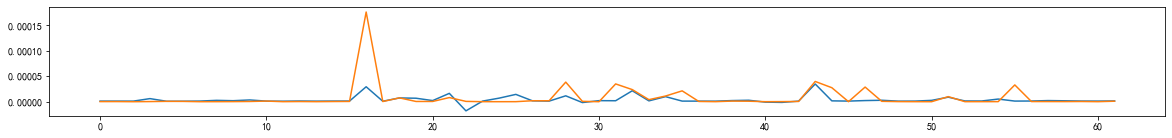

In [113]:
fig = plt.figure(figsize=(20, 2))
plt.plot(Y_predict_real/(1024*1024))
plt.plot(Y_test_real/(1024*1024))
#其中figsize参数用于设置图形窗口的大小。
#对于Y_predict_real和Y_test_real进行归一化处理，将返回的结果转换为单位为MB（兆字节），即除以1024*1024

In [114]:
def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)
def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print(f"根均方误差(RMSE)：{RMSE(Y_predict_real/(1024*1024), Y_test_real/(1024*1024))}")
print(f"平均绝对百分比误差(MAPE)：{MAPE(Y_predict, Y_test)}")

根均方误差(RMSE)：2.090747094419617e-05
平均绝对百分比误差(MAPE)：2.047230983730555


In [115]:
T2 =time.process_time()
print('程序运行时间:%s毫秒' % ((T2 - T1)*1000))
# 系统: Windows
# 程序运行时间:-毫秒

程序运行时间:16703.125毫秒
